# Importing libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import (KFold,RepeatedKFold, LeaveOneOut, StratifiedKFold, train_test_split, cross_validate,LeavePOut)


In [88]:
#read the data
df = pd.read_csv('diabetes_data_Final.csv')

In [89]:
df.head()

,Age,AgeGroup,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,3,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,5,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,3,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,60,5,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
4,55,5,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive


In [90]:
print("No.of datapoints", df.shape[0])
print("N0.of features",df.shape[1])
print("Features", df.columns.values)
print("class imbalance", df['class'].value_counts())

No.of datapoints 505
N0.of features 18
Features ['Age' 'AgeGroup' 'Gender' 'Polyuria' 'Polydipsia' 'sudden weight loss'
 'weakness' 'Polyphagia' 'Genital thrush' 'visual blurring' 'Itching'
 'Irritability' 'delayed healing' 'partial paresis' 'muscle stiffness'
 'Alopecia' 'Obesity' 'class']
class imbalance Positive    309
Negative    196
Name: class, dtype: int64


# Checking Missing values

In [91]:
df.isnull().sum()

Age                   0
AgeGroup              0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

No null values in the dataset

In [6]:
df.shape

(505, 18)

# Continous variables to binning

In [7]:
def age_bin(age):
    
    if age >= 0 and age<=24:
        return "group1"
    elif age >= 25 and age<=34:
        return "group2"
    elif age >= 35 and age<=44:
        return "group3"
    elif age >= 45 and age<=54:
        return "group4"
    elif age >= 55 and age<=64:
        return "group5"
    elif age >= 65 and age<=74:
        return "group6"
    else:
        return "group7"

In [8]:
df["AGE_GROUP"] = df["Age"].apply(age_bin)

In [9]:
df.head()

,Age,AgeGroup,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,AGE_GROUP
0,40,3,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,group3
1,58,5,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,group5
2,41,3,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,group3
3,60,5,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,group5
4,55,5,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive,group5


# Correlation Plot

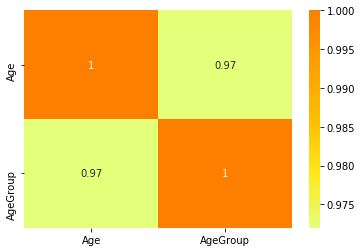

In [10]:
corr =df.corr()
sns.heatmap(corr, cmap ='Wistia', annot = True)

# One Hot encoding

In [11]:
#Dummy Variable

categorical_columns = ['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']
df_encode = pd.get_dummies(data = df, columns = categorical_columns,drop_first =True,dtype = 'int8')


In [13]:
#verify the dummy variable process
print('Columns in original data frame:\n', df.columns.values)
print('\n Number of rows and columns in the dataset:', df.shape)
print('\nColumns in data frmae after encoding dummy variable:\n', df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['Age' 'AgeGroup' 'Gender' 'Polyuria' 'Polydipsia' 'sudden weight loss'
 'weakness' 'Polyphagia' 'Genital thrush' 'visual blurring' 'Itching'
 'Irritability' 'delayed healing' 'partial paresis' 'muscle stiffness'
 'Alopecia' 'Obesity' 'class' 'AGE_GROUP']

 Number of rows and columns in the dataset: (505, 19)

Columns in data frmae after encoding dummy variable:
 ['Age' 'AgeGroup' 'class' 'AGE_GROUP' 'Gender_Male' 'Polyuria_Yes'
 'Polydipsia_Yes' 'sudden weight loss_Yes' 'weakness_Yes' 'Polyphagia_Yes'
 'Polyphagia_Yes' 'Genital thrush_Yes' 'visual blurring_Yes' 'Itching_Yes'
 'Irritability_Yes' 'delayed healing_Yes' 'partial paresis_Yes'
 'muscle stiffness_Yes' 'Alopecia_Yes' 'Obesity_Yes']

Number of rows and columns in the dataset: (505, 20)


In [14]:
df_encode.head()

,Age,AgeGroup,class,AGE_GROUP,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,3,Positive,group3,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1
1,58,5,Positive,group5,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
2,41,3,Positive,group3,1,1,0,0,1,1,1,0,0,1,0,1,0,1,1,0
3,60,5,Positive,group5,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
4,55,5,Positive,group5,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,1


In [15]:
df_encode.AgeGroup.value_counts()

3    147
4    137
5    102
2     62
6     51
7      5
1      1
Name: AgeGroup, dtype: int64

In [16]:
data =df_encode.drop(["Age"],axis =1)

# Ordinal Encoding

In [17]:
cat_var =["AGE_GROUP"]

In [18]:
#function that gives ordinal values fo the data frame
def ordinal_mapper(data, var):
    
    """
    It takes data and variable and transform the categorical to numerical
    """
    
    #mapper
    ordinal_map = {
    k:i for i,k in enumerate(data[var].unique(),0)
    }
    
    #applying the map
    data[var]=data[var].map(ordinal_map)

In [19]:
for var in cat_var:
    ordinal_mapper(data,var)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
data.shape

(505, 19)

In [21]:
data.head()

,AgeGroup,class,AGE_GROUP,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,3,Positive,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1
1,5,Positive,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
2,3,Positive,0,1,1,0,0,1,1,1,0,0,1,0,1,0,1,1,0
3,5,Positive,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
4,5,Positive,1,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,1


In [22]:
df_encode.shape

(505, 20)

In [46]:
df_encode.head()
df_encode.drop(["AGE_GROUP"],axis =1)

,Age,AgeGroup,class,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,3,Positive,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1
1,58,5,Positive,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
2,41,3,Positive,1,1,0,0,1,1,1,0,0,1,0,1,0,1,1,0
3,60,5,Positive,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
4,55,5,Positive,1,1,1,0,1,1,1,0,1,1,0,1,0,1,1,1
5,66,6,Positive,1,1,1,1,1,0,0,0,1,1,1,0,1,1,0,0
6,67,6,Positive,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1
7,70,6,Positive,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,0
8,44,3,Positive,1,1,1,0,1,0,0,1,0,0,1,1,0,1,1,0
9,38,3,Positive,1,1,1,0,0,1,1,1,0,1,0,1,0,1,0,0


# Splitting the data converting Age into bins(ordinal encoding)

In [30]:
#splitting the data
X=data.drop(['class'], axis =1)
y=data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape , X_test.shape

((353, 18), (152, 18))

# Modeling

In [85]:
#Support Vector Machine

svc = SVC(gamma = 'auto', kernel = 'rbf')

kf = KFold(n_splits=10, shuffle=True, random_state=4)
clf1 = cross_validate(svc, X_train, y_train, scoring="accuracy", return_estimator=True, cv=kf)

#model1=svc.fit(X_train,y_train)
#svc.predict(X_test)
#score1 = svc.score(X_test, y_test)
#print("Prediction Score of SVC model is:",score1)

In [86]:
score1 =clf1["test_score"].mean()
score1

0.9265873015873016

# Splitting the data without converting Age into bins

In [53]:
#splitting the data
X_encode=df_encode.drop(['class','AGE_GROUP'], axis =1)
y_encode=df_encode['class']

X_train_encode, X_test_encode, y_train_encode, y_test_encode = train_test_split(X_encode, y_encode, test_size=0.3, random_state=42)
X_train_encode.shape , X_test_encode.shape

((353, 18), (152, 18))

# Modeling

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs',max_iter =1000)

kf = KFold(n_splits=10, shuffle=True, random_state=4)

clf = cross_validate(logreg, X_train_encode, y_train_encode, scoring="accuracy", return_estimator=True, cv=kf)
#model = logreg.fit(X_train_encode, y_train_encode)
#y_pred = model.predict(X_test_encode)

#score2  = model.score(X_test_encode, y_test_encode)
#print("Prediction Score of Logistic Regression Model is:",score2)

In [81]:
score2 =clf["test_score"].mean()
score2

0.9181746031746032

In [82]:
scores_list = [score1,score2]
list = ['SVM','Logistic Regression']

print("Predictions scores are:", scores_list,list)

Predictions scores are: [0.9265873015873016, 0.9181746031746032] ['SVM', 'Logistic Regression']


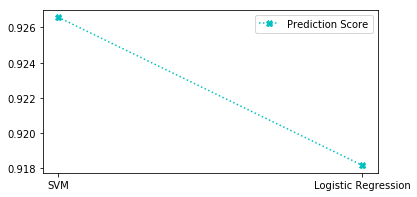

In [83]:
plt.style.use('seaborn-colorblind')
fig, ax =plt.subplots(figsize=(6,3))
ax.plot(list,scores_list,marker="X", linestyle=":", color="c", label ="Prediction Score")
ax.legend()
plt.show()